## Машинное обучение в бизнесе - Проект

## Введение

В рамках данного проекта требуется определить наиболее перспективный и прибыльный регион для добычи нефти, основываясь на данных о характериках скважин: качеству нефти и её запасах.

## Шаг 1. Загрузка данных

In [176]:
# Импортируем основные библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

Загружаем и изучаем данные о трёх регионах. Дадим регионам имена Альфа, Браво и Танго.

In [177]:
# data_alpha = pd.read_csv('/Users/peterefimov/Dropbox/DS_projects/7. ML in business. Project./geo_data_0.csv')
data_calls = pd.read_csv('/datasets/geo_data_0.csv')
# data_bravo = pd.read_csv('/Users/peterefimov/Dropbox/DS_projects/7. ML in business. Project./geo_data_0.csv')
data_calls = pd.read_csv('/datasets/geo_data_1.csv')
# data_tango = pd.read_csv('/Users/peterefimov/Dropbox/DS_projects/7. ML in business. Project./geo_data_2.csv')
data_calls = pd.read_csv('/datasets/geo_data_2.csv')

In [178]:
print('Регион Альфа')
display(data_alpha.head())
print('Регион Браво')
display(data_bravo.head())
print('Регион Танго')
display(data_tango.head())

Регион Альфа


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


Регион Браво


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


Регион Танго


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [179]:
print('Регион Алфьа')
print(data_alpha.info())
print('Регион Браво')
print(data_bravo.info())
print('Регион Танго')
print(data_tango.info())

Регион Алфьа
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
Регион Браво
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
Регион Танго
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data c

Данные импортированы, пропусков нет. Учитывая условие, что данные синтетические, и что они выглядят отмасштабированными, считаем, что прочая подготовка к моделированию не требуется.

## Шаг 2. Обучение моделей.

 Разделим данные о регионах на X и Y.

In [180]:
# В обучающей выборке считаю нужным сразу удалить столбец id, 
# т.к. это синтетический номер, не влияющий на целевой признак

x_alpha = data_alpha.drop(['id','product'], axis=1)
y_alpha = data_alpha['product']

x_bravo = data_bravo.drop(['id','product'], axis=1)
y_bravo = data_bravo['product']

x_tango = data_tango.drop(['id','product'], axis=1)
y_tango = data_tango['product']

А теперь разделим на обучающие и валидационные выборки

In [181]:
# Разделем альфу
x_alpha_train, x_alpha_valid, y_alpha_train, y_alpha_valid = (
    train_test_split(x_alpha, y_alpha, test_size=0.25, random_state=12345))

# Разделем Браво
x_bravo_train, x_bravo_valid, y_bravo_train, y_bravo_valid = (
    train_test_split(x_bravo, y_bravo, test_size=0.25, random_state=12345))

# Разделяем Танго
x_tango_train, x_tango_valid, y_tango_train, y_tango_valid = (
    train_test_split(x_tango, y_tango, test_size=0.25, random_state=12345))

# Проверим результат разделения Альфы, посмотрев формы получившихся данных
x_alpha_train.shape, x_alpha_valid.shape, y_alpha_train.shape, y_alpha_valid.shape

((75000, 3), (25000, 3), (75000,), (25000,))

Разделение прошло успешно. Далее обучим модель линейной регрессии для каждого региона.

In [182]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg_alpha = LinearRegression().fit(x_alpha_train, y_alpha_train)
y_alpha_predict = linreg_alpha.predict(x_alpha_valid)
alpha_mean_product = y_alpha_predict.mean()
alpha_rmse = (mean_squared_error(y_alpha_valid, y_alpha_predict)) ** 0.5

print(f'Средний запас продукта Альфа {alpha_mean_product}')
print(f'RMSE Альфа = {alpha_rmse}')
print()

linreg_bravo = LinearRegression().fit(x_bravo_train, y_bravo_train)
y_bravo_predict = linreg_bravo.predict(x_bravo_valid)
bravo_mean_product = y_bravo_predict.mean()
bravo_rmse = (mean_squared_error(y_bravo_valid, y_bravo_predict)) ** 0.5

print(f'Средний запас продукта Браво {bravo_mean_product}')
print(f'RMSE Браво = {bravo_rmse}')
print()

linreg_tango = LinearRegression().fit(x_tango_train, y_tango_train)
y_tango_predict = linreg_tango.predict(x_tango_valid)
tango_mean_product = y_tango_predict.mean()
tango_rmse = (mean_squared_error(y_tango_valid, y_tango_predict)) ** 0.5

print(f'Средний запас продукта Танго {tango_mean_product}')
print(f'RMSE Танго = {tango_rmse}')

Средний запас продукта Альфа 92.59256778438038
RMSE Альфа = 37.5794217150813

Средний запас продукта Браво 68.72854689544602
RMSE Браво = 0.893099286775616

Средний запас продукта Танго 94.96504596800489
RMSE Танго = 40.02970873393434


Модели для трёх регионов обучены, однако RMSE в регионе Браво значительно отличается. Попробуем определить причину. Построим точечную диаграмму для Браво и посмотрим матрицу корреляций для всех регионов.

Точечная диаграмма для Браво


<Figure size 432x288 with 0 Axes>

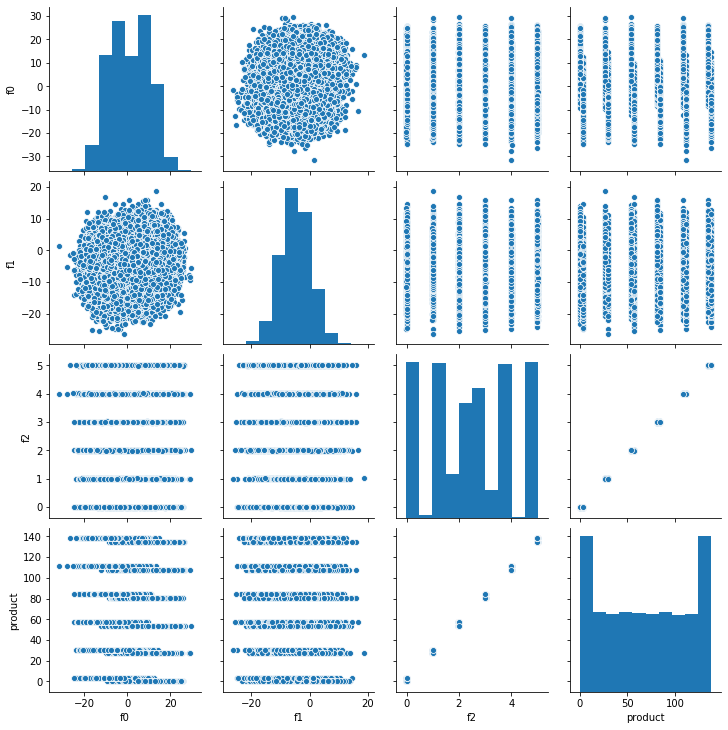

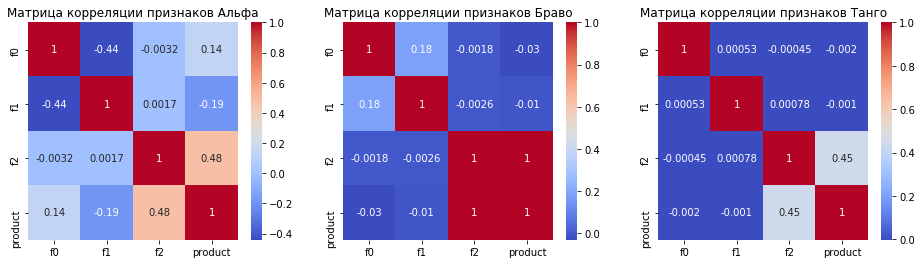

In [183]:
print('Точечная диаграмма для Браво')
plt.figure(figsize=(6,4))
sns.pairplot(data_bravo)
plt.show()

fig = plt.figure(figsize=(16, 4))

subplot = fig.add_subplot(1, 3, 1)
sns.heatmap(data_alpha.corr(), 
            annot = True, 
            cmap='coolwarm')
plt.title(f'Матрица корреляции признаков Альфа')

subplot = fig.add_subplot(1, 3, 2)
sns.heatmap(data_bravo.corr(), 
            annot = True, 
            cmap='coolwarm')
plt.title(f'Матрица корреляции признаков Браво')

subplot = fig.add_subplot(1, 3, 3)
sns.heatmap(data_tango.corr(), 
            annot = True, 
            cmap='coolwarm')
plt.title(f'Матрица корреляции признаков Танго')

plt.show()

В случае региона Браво наблюдаем явную корреляцию между признаком f2 и целевым признаком. Этим объясняется подозрительно высокое качество модели на валидационной выборке. 

## Шаг 3. Подготовка к расчёту прибыли.

Введём переменные для расчёта прибыли.

In [184]:
# Прибыль с 1 тысячи баррелей, тыс. руб.
kbar_profit = 450 

Бюджет на разработку будем считать равным расходам на разработку скважин в регионе. Сократим 3 нуля, т.к. прибыль считаем в тысячах

In [185]:
# Стоимость разработки, в тыс. руб.
cost = 10000000

Рассчитаем безубыточный объём продукат для разработки региона в целом и средний объём отдельной скважины. Для этого нужно, чтобы суммарная прибыль от добычи продукта из 200 лучших скважин превышала затраты на разработку.

In [186]:
# Округлим до 2 знаков после запятой
product_total_min = round((cost / kbar_profit),2)
print(f'Минимальный безубыточный запас продукта в регионе {product_total_min}')

product_mean_min = round((product_total_min / 200),2)
print(f'Минимальный средний запас продукта в скважине {product_mean_min}')

Минимальный безубыточный запас продукта в регионе 22222.22
Минимальный средний запас продукта в скважине 111.11


In [187]:
# Для сравнения ещё раз выведем ранее полученные средние значения
print(f'Средний запас продукта Альфа {round((alpha_mean_product),2)}')
print(f'Средний запас продукта Браво {round((bravo_mean_product),2)}')
print(f'Средний запас продукта Танго {round((tango_mean_product),2)}')

Средний запас продукта Альфа 92.59
Средний запас продукта Браво 68.73
Средний запас продукта Танго 94.97


Видим, что если рассматривать все скважины в каждом регионе, их средний объём продукта недостаточен для безубыточной разработки. Наиболее перспективным выглядит регион Танго.

## Шаг 4. Функция для расчёта прибыли.

Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели.

In [188]:
# Сбрасываем индексы у предсказаний

y_alpha_predict = pd.Series(data = y_alpha_predict, index=y_alpha_valid.index)
y_bravo_predict = pd.Series(data = y_bravo_predict, index=y_bravo_valid.index)
y_tango_predict = pd.Series(data = y_tango_predict, index=y_tango_valid.index)

# Создаём функцию для расчёта прибыли с выводом на печать суммарного объёма по топ 200 скважинам и прибыли

def profit_with_prints(target, predictions):
    predictions = pd.Series(predictions)    
    predictions_sorted = predictions.sort_values(ascending=False)
    sort = predictions_sorted[:200]
    selected = target[sort.index][:200].reset_index(drop=True)
    selected_product_total = round(selected.sum(),2)
    profit_total = kbar_profit * selected_product_total
    revenue_total = round((profit_total - cost),2)    
    print(f'Суммарный объём продукта {selected_product_total}')
    print(f'Прибыль в регионе {revenue_total}')

print('Данные для региона Альфа')
profit_with_prints(y_alpha_valid, y_alpha_predict)
print()
print('Данные для региона Браво')
profit_with_prints(y_bravo_valid, y_bravo_predict)
print()
print('Данные для региона Танго')
profit_with_prints(y_tango_valid, y_tango_predict)

Данные для региона Альфа
Суммарный объём продукта 29601.84
Прибыль в регионе 3320828.0

Данные для региона Браво
Суммарный объём продукта 27589.08
Прибыль в регионе 2415086.0

Данные для региона Танго
Суммарный объём продукта 28245.22
Прибыль в регионе 2710349.0


Получили данные по топ 200 скважинам для каждого региона. Регион Альфа показывает наибольшую прибыльность в сравнении с другими.

## Шаг 5. Расчёт прибыли с техникой Bootstrap и оценка рисков.

Рассчитаем прибыль и риски для каждого региона с применением метода Bootstrap. Также определим риск убытков и доверительный интервал среднего значения прибыли.

In [189]:
import numpy as np
from scipy import stats as st
state = np.random.RandomState(12345)

# Изменим функцию расчёта прибыли - удалим вывод значений на печать 
# и добавим возможность возвращения прибыли

def profit_bootstrap(target, predictions):
    predictions = pd.Series(predictions)
    
#     Сортируем предсказания
    predictions_sorted = predictions.sort_values(ascending=False)
    
#     Отбираем топ 200
    sort = predictions_sorted[:200]
    
#     Возвращаемся к реальным значениям
    selected = target[sort.index][:200].reset_index(drop=True)
    
#     Определяем суммарное количество продукта по топ 200 скважинам
    selected_product_total = round(selected.sum(),2)
    
#     Определяем общую прибыль
    profit_total = kbar_profit * selected_product_total
    revenue_total = round((profit_total - cost),2)    
    return revenue_total

# Напишем функцию, применяющую Bootstrap к региону. 
# В параметры будем направлять предсказания модели и валидационную выборку

def bootstrap(valid, predict, region_name):
    print(region_name)
    values = []
    for i in range(1000):
        target_subsample = valid.sample(n=500, replace=True, random_state=state)
        probs_subsample  = pd.Series(data=predict, index=target_subsample.index)
        values.append(profit_bootstrap(target_subsample, probs_subsample))

    values = pd.Series(values)
    
# Определяем среднюю прибыль
    print(f'Средняя прибыль, тыс. руб.: {values.mean()}')
    
# Доверительный 95%-й интервал
    confidence_interval = st.t.interval(0.95, 
                                      (len(values)-1), 
                                      values.mean(), 
                                      values.sem())
    print(f'Доверительный интервал {confidence_interval}')
    
# Определяем риск убытков
    risk = ((values < 0).mean())
    print('Риск убытков {:.2%}'.format(risk))
    print()

# Вызываем функцию для каждого региона
bootstrap(y_alpha_valid, y_alpha_predict, 'Альфа')
bootstrap(y_bravo_valid, y_bravo_predict, 'Браво')
bootstrap(y_bravo_valid, y_bravo_predict, 'Танго')

Альфа
Средняя прибыль, тыс. руб.: 425938.5035
Доверительный интервал (408732.1861336162, 443144.8208663838)
Риск убытков 6.00%

Браво
Средняя прибыль, тыс. руб.: 518259.536
Доверительный интервал (505249.919123801, 531269.152876199)
Риск убытков 0.30%

Танго
Средняя прибыль, тыс. руб.: 506814.2855
Доверительный интервал (493827.7932612398, 519800.77773876017)
Риск убытков 0.80%



Получили результат, отличающийся от изначальных предположений. Регион Браво выглядит наиболее перспективным. Вероятно, это связано с начальными данными, где была обнаружена сильная корреляция между начальным признаком и целевым признаком. Можно предположить, что начальные данные дают модели лучше обучиться и давать более точные предсказания.

## Вывод

В ходе проекта были выполнены следующие этапы:
1. Импортированы и подготовлены данные геологоразведки
2. Обучена модель линейной регрессии для каждого из трёх регионов
3. Разработана методика расчёта прибыли от разработки региона
4. На множественных выборках оценена возможная прибыль в каждом регионе и степень риска.

## Рекомендация
Анализ показал, что наиболее перспективным регионом для разработки является регион Браво, т.к. его среднее значение прибыли превосходит остальные, его доверительный интервал расположен выше других, а также он обладает минимальной степенью риска.